In [201]:
%matplotlib inline
df = pd.read_csv('sephora_clean.csv')

In [202]:
df.sample(10)

name               brand  \
3676                              colonia talcum powder      acqua di parma   
1829                     hollywood lips liquid lipstick   charlotte tilbury   
2851               no.04 bois de balincourt body lotion  maison louis marie   
3376           orange sanguine moisturizing body lotion     atelier cologne   
3097                   skin smoothing cream moisturizer         dermalogica   
4318                                    noir pour femme            tom ford   
90    blackhead solutions 7 day deep pore cleanse & ...            clinique   
3017                           white brightening lotion             eve lom   
3492                  abeille royale daily repair serum            guerlain   
5071                                               lips               go-to   

         family           genus                 species  price  weight  \
3676  Fragrance             Men           Bath & Shower   60.0    3.50   
1829     Makeup             Lip                Lipstick   34.0    0.24   
2851  Fragrance           Women          Lotions & Oils   45.0    8.00   
3376  Fragrance           Women          Lotions & Oils   60.0    8.90   
3097   Skincare    Moisturizers            Moisturizers   69.0    3.40   
4318  Fragrance           Women                 Perfume  128.0    1.70   
90     Skincare       Cleansers             Exfoliators   24.0    4.20   
3017   Skincare    Moisturizers            Moisturizers   75.0    4.05   
3492   Skincare      Treatments             Face Serums  155.0    1.00   
5071   Skincare  Lip Treatments  Lip Balms & Treatments   12.0    0.53   

      volume  num_loves  num_reviews  ave_rating  \
3676   104.0        290            1         5.0   
1829     7.0      16300           39         4.0   
2851   237.0        584            5         3.8   
3376   265.0       1100            4         4.5   
3097   100.0        933           75         4.4   
4318    50.0       9700          185         4.5   
90     125.0      10800          486         4.2   
3017   120.0       1100            7         3.9   
3492    30.0       6500           21         3.9   
5071     NaN       2800           21         3.1   

                                                details  \
3676  ['an elegant timeless scent filled with a fres...   
1829  ['what it is:\na matte contour liquid lipstick...   
2851  ['what it is: a body lotion that hydrates, pro...   
3376  ['what it is:\na moisturizing body lotion with...   
3097  ['what it is: a moisturizer that infuses skin ...   
4318  ['fragrance family: warm & spicy\n\nscent type...   
90    ['which skin type is it good for?\n✔ normal\n✔...   
3017  ['which skin type is it good for?\n✔ normal\n✔...   
3492  ["what it is:\na daily repair age-defying seru...   
5071  ['what it is:\na deeply restorative, soothing,...   

                                            ingredients  oz_from_mL  \
3676  ['talc, fragrance, limonene, hydroxycitronella...        3.50   
1829  ["-beeswax: helps to prevent your lips against...        0.24   
2851  ['water, helianthus annus (sunflower) seed oil...        8.00   
3376  ['water, fragrance, glycerine, isononyl isonon...        8.90   
3097  ['-mallow: provides natural moisturizing and s...        3.40   
4318  ['alcohol denat., fragrance, water, tocopherol...        1.70   
90    ['-potent blend of salicylic acid and glucosam...        4.20   
3017  ['-dermapep™: improves pigmentation and unifie...        4.05   
3492  ['-new generation pure royal concentrate (excl...        1.00   
5071  ['-medical grade lanolin: provides healing, mo...        0.53   

      price_per_oz  
3676     17.142857  
1829    141.666667  
2851      5.625000  
3376      6.741573  
3097     20.294118  
4318     75.294118  
90        5.714286  
3017     18.518519  
3492    155.000000  
5071     22.641509

In [122]:
df.describe()

price       weight       volume     num_loves   num_reviews  \
count  5654.000000  5049.000000  3641.000000  5.654000e+03   5654.000000   
mean     50.418042     2.943166    90.857182  1.856639e+04    352.685356   
std      43.716698     9.537146   100.208066  4.744429e+04   1012.546284   
min       3.000000     0.000800     0.000000  0.000000e+00      0.000000   
25%      25.000000     0.500000    30.000000  1.800000e+03     16.000000   
50%      37.000000     1.700000    50.000000  5.400000e+03     68.000000   
75%      60.000000     4.000000   125.000000  1.590000e+04    274.000000   
max     495.000000   625.000000  2806.000000  1.200000e+06  19000.000000   

        ave_rating   oz_from_mL  price_per_oz  
count  5526.000000  5056.000000   5056.000000  
mean      4.177633     2.943867    140.690299  
std       0.485734     9.531163    693.223637  
min       1.000000     0.000800      0.232000  
25%       4.000000     0.500000      8.854396  
50%       4.200000     1.700000     37.058824  
75%       4.500000     4.000000     90.000000  
max       5.000000   625.000000  20000.000000

In [203]:
df.nunique()

name            5974
brand            283
family             8
genus             29
species           96
price            250
weight           332
volume           173
num_loves       1410
num_reviews     1079
ave_rating        34
details         5924
ingredients     5218
oz_from_mL       338
price_per_oz    1854
dtype: int64

In [204]:
df.groupby('family').size()

family
Bath & Body         213
Fragrance           942
Gifts                 1
Hair                809
Makeup             1862
Men                 121
Skincare           2038
Tools & Brushes      23
dtype: int64

In [206]:
df = df.loc[~df['name'].str.contains('mini')]
df = df.loc[~df['name'].str.contains('travel')]
df = df.loc[~(df['family'].str.contains('accessor')) | 
           (df['genus'].str.contains('accessor')) |
           (df['species'].str.contains('accessor'))]
bath_body = df.loc[df['family']=='Bath & Body']
fragrance = df.loc[df['family']=='Fragrance']
hair = df.loc[df['family']=='Hair']
makeup = df.loc[df['family']=='Makeup']
men = df.loc[df['family']=='Men']
skincare = df.loc[df['family']=='Skincare']

In [126]:
print(bath_body.shape)
print(fragrance.shape)
print(makeup.shape)
print(skincare.shape)
print(men.shape)
print(hair.shape)

(200, 15)
(874, 15)
(1781, 15)
(1896, 15)
(117, 15)
(761, 15)


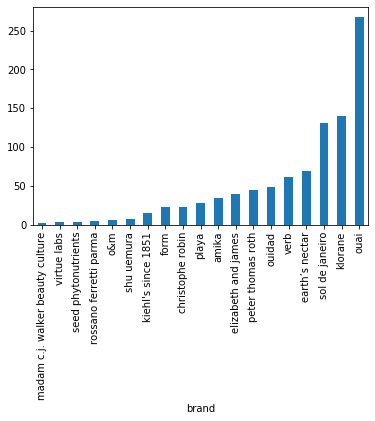

In [128]:
#fig = plt.figure(figsize=(10,4))
#bath_body.groupby('brand')['price_per_oz'].median().sort_values().plot.bar()
#bath_body.loc[bath_body['name'].str.contains('shampoo')]
shampoos = df.loc[df['name'].str.contains('shampoo')]
#conditioners = df.loc[df['name'].str.contains('conditioner')]
#plt.subplot(1,2,1)
#print(hair['brand'].nunique())
#print(conditioners['brand'].nunique())
#shampoos.groupby('brand')['price_per_oz'].median().sort_values().plot.bar()
brands = shampoos['brand'].unique()
medprice = []
for brand in brands:
    medprice.append(shampoos.loc[shampoos['brand'] == brand]['price_per_oz'].median())
firstq = np.quantile(medprice, 0.25)
thirdq = np.quantile(medprice, 0.75)
# cheap_brands = []
# expensive_brands = []
# for i, brand in enumerate(brands):
#     if medprice[i] < 
expensive_brands = brands[medprice > thirdq]
cheap_brands = brands[medprice < firstq]
shampoos_cheap = shampoos.loc[shampoos['brand'].isin(cheap_brands)]
shampoos_expensive = shampoos.loc[shampoos['brand'].isin(expensive_brands)]

shampoos_to_compare = pd.concat([shampoos_cheap, shampoos_expensive])

#shampoos_to_compare.groupby(['brand'])['price_per_oz'].median().sort_values().plot.bar()
brands_to_compare = hair.loc[hair['brand'].isin(cheap_brands) | hair['brand'].isin(expensive_brands)]

#brands_to_compare.columns
#brands_to_compare.groupby('brand')['num_loves'].median().sort_values().plot.bar()
#brands_to_compare.groupby('brand')['num_reviews'].median().sort_values().plot.bar()



In [207]:
df_ingredients = df[['name','brand','ingredients']].dropna()
ingredients_list = df_ingredients['ingredients'].values.flatten()
ingredients_list = [x.split('clean at sephora products are formulated without:')[0] for x in ingredients_list]

In [287]:
bad_ingredients_list = open('banned_substances3.txt', 'r').readlines()
print(len(bad_ingredients_list))
bad_ingredients_list = [x.strip() for x in bad_ingredients_list if x not in ['2', 'ethyl', 'tar','alpha','ammonium']]
print(len(bad_ingredients_list))
# df_bad_ingredients = []
# for list_ in ingredients_list:
#     list_ = list_.replace('phenoxyethanol', '').replace('cocamidopropyl','').\
#         replace('starch','').replace('hexanediol','')
#     df_bad_ingredients.append(', '.join([x for x in bad_ingredients if x in list_]))
bad_ingredients_list = [x for x in bad_ingredients_list if x not in ['2', 'alpha', 'bis', 'diethyl']]
#df_bad_ingredients = ['' for x in bad_ingredients if x == []]

#print(bad_ingredients)

1545
1545


In [298]:
safe_ingredients = ['chromium oxide greens', 'phenoxyethanol', 'cocamidopropyl', 'hydroxyethyl acetat',
                   'polyvinyl acetate', 'starch', 'chromium hydroxide green', '1,2-hexanediol,']

bad_ingredients_fullstring = []
for list_ in ingredients_list:
    lines = list_.split('\\n')
    lines = [line for line in lines if (len(line)>1) and line[0] != '-']
    list_ = ' '.join(lines)
    for word in safe_ingredients:
        list_.replace(word,'')
    bad_ingredients_fullstring.append([x for x in bad_ingredients_list if x in list_])


In [289]:
bad_ingredients_words = []
for list_ in ingredients_list:
    bad_ingredients = []
    lines = [x for x in list_.split('\\n') if len(x) > 1]
    for line in lines:
        ingdts = line.split(',')
        words = []
        for ingdt in ingdts:
            words.extend(ingdt.split('/')) 
        words = [word.strip() for word in words]
        print(words)
        for word in words:
            if word in bad_ingredients_list:
                bad_ingredients.append(word)
    bad_ingredients_words.append(bad_ingredients)
    #   if len(list_.split('/n')) > 1:
  #      print(list_.split('/n')[0])
    
#    for ingdt in bad_ingredients:
 #       if ingdt in list_:
 #           print(ingdt)
#            df_bad_ingredients.append(ingdt)
#    print(list_)
#    list_ = list_.replace('phenoxyethanol', '').replace('cocamidopropyl','').\
 #       replace('starch','').replace('hexanediol','')
 #   df_bad_ingredients.append('; '.join([x for x in bad_ingredients if x in list_]))

#df_bad_ingredients = ['' for x in bad_ingredients if x == []]

["['-wild-firming complex™ with grace soybean: strengthens skin with amino acids"]
['-olive oil-derived squalane and soy butter: moisturizes and softens.']
['water', 'squalane', 'propanediol', 'polyglyceryl-3 methylglucose distearate', 'dimethicone', 'diisostearylmalate', 'glyceryl stearate', 'hydrogenated castor oil isostearate', 'cetearyl alcohol', 'phytosteryl isostearyl dimerdilinoleate', 'behenyl alcohol', 'glycerin', '1', '2-hexanediol', 'butylene glycol', 'polyacrylate-13', 'polyisobutene', 'fragrance', 'parfum', 'disodium edta', 'ethylhexylglycerin', 'adenosine', 'polysorbate 20', 'sorbitan isostearate', 'sodium polyacrylate', 'dextrin', 'theobromacacao (cocoa) extract', 'butyrospermum parkii (shea) butter', 'glycine soja (soybean) sprout extract', 'glycine soja(soybean) seed extract', 'hydrogenated soybean oil', 'tocopherol.']
['["-okinawa red algae: visibly improves skin’s moisture barrier and assists the skin’s natural moisture-retaining capabilities with its rich source of 

["['water", 'butylene glycol', 'pentaerythrityl tetraethylhexanoate', 'diphenylsiloxy phenyl trimethicone', 'glycerin', 'dipropylene glycol', 'alcohol denat.', 'betaine', 'peg-60 hydrogenated castor oil', 'phenoxyethanol', 'methylparaben', 'sodium citrate', 'carbomer', 'fragrance', 'bht', 'squalane', 'tocopheryl acetate', 'xanthan gum', 'potassium hydroxide', 'retinol', 'polysorbate 20', 'citric acid', 'alcohol', 'trisodium edta', 'arginine hcl', 'magnesium ascorbyl phosphate', 'glucosyl hesperidin', 'butylphenyl methylpropional', 'hexyl cinnamal', 'alpha-isomethyl ionone', 'linalool', 'limonene', 'citronellol', 'panax ginseng root extract', 'geraniol', 'sodium acetylated hyaluronate', 'hydroxyproline', 'rubus suavissimus (raspberry) leaf extract', 'chlorella vulgaris extract', "beta-carotene (ci 75130).']"]
["['-red ginseng root extract: energizes", 'balances', 'and refreshes skin.']
['-water lily extract: offers natural purifying and astringent properties to promote clean', 'soft', '

['cyclopentasiloxane', 'water', 'rosa damascena (rose) flower water', 'citrus aurantium amara (bitter orange) flower water', 'glycerin', 'butylene glycol', 'dimethicone', 'vinyl dimethicone crosspolymer', 'cetyl peg', 'ppg-10', '1 dimethicone', 'boswellia serrata extract', 'camellia sinensis (white tea) leaf extract', 'citrus aurantium bergamia (bergamot) fruit oil*', 'citrus medica limonum (lemon) peel oil*', 'citrus aurantium dulcis (orange) oil*', 'cinnamomum camphora (camphor) bark oil*', 'mentha viridis (spearmint) leaf oil*', 'vetiveria zizanoides root oil*', 'plumeria alba flower extract', 'magnolia acuminata flower extract', 'iris pallida root extract', 'rosa damascena extract', 'citral', 'linalool', 'limonene', 'magnesium ascorbyl phosphate', 'dimethicone', 'hydroxyethyl acrylate', 'sodium acryloyldimethyl taurate copolymer', 'potato starch modified', 'squalane', 'caprylyl glycol', 'tocopheryl acetate', 'polysorbate 60', 'hexylene glycol', 'phenoxyethanol * essential oil.']
['

["['trimethylsiloxysilicate", 'cyclopentasiloxane', 'isododecane', 'polyethylene', 'synthetic wax', 'ceresin', 'polyglyceryl-2 triisostearate', 'polyisobutene', 'persea gratissima (avocado) oil', 'biotin', 'water', 'vaccinium angustifolium (blueberry) fruit extract', 'phenoxyethanol. may contain (+', '-): titanium dioxide (ci 77891)', 'iron oxides (ci 77491', 'ci 77499)', "mica (ci 77019).']"]
["['-natural rose extract."]
['water', 'caprylic', 'capric triglyceride', 'glycerin', 'peg-40 hydrogenated castor oil', 'phenoxyethanol', 'benzyl alcohol', 'ethylhexylglycerin', 'fragrance', 'rosa damascena flower water', 'sodium lauroyl lactylate', 'glyceryl stearate', 'lauryl glucoside', 'panthenol', 'cetearyl alcohol', 'sodium stearoyl lactylate', 'citric acid', 'sodium benzoate', 'tocopherol', "potassium sorbate.']"]
["['-organic green banana and lemon thyme: promote firmness and elasticity."]
['-palmitoyl glycine: visibly reduces stress lines and wrinkles.']
['-acerola seed extract: revives 

['water', 'cetearyl alcohol', 'glycerin', 'olea europaea (olive) fruit oil', 'vitis vinifera (grape)seed oil', 'propanediol', 'stearamidopropyl dymethylamine', 'lanolin', 'helianthus annuus (sunflower) seed oil', 'cyclopentasiloxane', 'behentrimonium chloride', 'butyrospermum parkii (shea) butter', 'polyquaternium-37', 'cetyl esters', 'cocos nucifera (coconut) oil', 'persea gratissima (avocado) oil', 'amodimethicone', 'bis-hydroxy', 'methoxy amodimethicone', 'c10-40 isoalkylamidopropylethyldimonium ethosulfate', 'c12-15 alkyl benzoate', 'cetrimonium chloride', 'cetrimonium methosulfate', 'citric acid', 'dipropylene glycol', 'guar hydroxypropyltrimonium chloride', 'hydroxyethylcellulose', 'palmitoyl myristyl serinate', 'panthenol', 'peg-8', 'peg-8', 'sdmi copolymer', 'propylene glycol dibenzoate', 'propylene glycol dicaprylate', 'quaternium-91', 'sodium polyacrylate', 'trideceth-12', 'trideceth-6', 'ethylhexylglycerin', 'phenoxyethanol', 'disodium edta', "fragrance.']"]
["['-secret sauc

['over the top:']
['mica', 'talc', 'lauroyl lysine', 'boron nitride', 'alumina', 'glyceryl caprylate', 'dimethicone', 'phenoxyethanol', 'zinc stearate', 'sodium dehydroacetate', 'methicone', 'potassium sorbate', 'triethoxycaprylylsilane', 'caprylic', 'capric triglyceride', 'mineral oil', 'paraffinum liquidum', 'tocopheryl acetate', 'tetrahexyldecyl ascorbate', 'iron oxides (ci 77491', 'ci 77492', 'ci 77499)', 'titanium dioxide (ci 77891)', 'black 2 (ci 77266).']
['glamour:']
['mica', 'lauroyl lysine', 'boron nitride', 'talc', 'glyceryl caprylate', 'phenoxyethanol', 'zinc stearate', 'dimethicone', 'caprylic', 'capric triglyceride', 'sodium dehydroacetate', 'potassium sorbate', 'tocopheryl acetate', 'tetrahexyldecyl ascorbate', 'methicone', 'iron oxides (ci 77491', 'ci 77499)', 'carmine (ci 75470)', "titanium dioxide (ci 77891).']"]
["['cyclopentasiloxane", 'trimethylsiloxysilicate', 'polyethylene', 'ceresin', 'diisostearyl malate', 'isododecane', 'calcium aluminum borosilicate', 'silica

["['eyeshadow:"]
['mica', 'synthetic fluorphlogopite', 'talc', 'phenyl trimethicone', 'magnesium stearate', 'ethylhexyl palmitate', 'silica', 'nylon-12', 'jojoba (simmondsia chinensis) oil', 'octyldodecyl stearoyl stearate', 'phenoxyethanol', 'caprylyl glycol. +', '- may contain: titanium dioxide (ci 77891)', 'iron oxides (ci 77491', 'ci 77492', 'ci 77499)', 'ultramarine blue (ci 77007)', 'ferric ferrocyanide (ci 77510)', 'fd&c red no.40 al lake (ci 16035)', 'fd&c yellow no.5 al lake (ci 19140)', 'fd&c blue no.1 al lake (ci 42090)', 'bismuth oxychloride (ci 77163).']
['glitter:']
['mica', 'synthetic fluorphlogopite', 'talc', 'phenyl trimethicone', 'magnesium stearate', 'ethylhexylpalmitate', 'silica', 'nylon-12', 'jojoba (simmondsia chinensis) oil', 'octyldodecyl stearoyl stearate', 'phenoxyethanol', 'caprylyl glycol. +', '- may contain: titanium dioxide (ci 77891)', 'iron oxides (ci 77491', 'ci 77492', 'ci 77499)', 'ultramarine blue (ci 77007)', 'ferric ferrocyanide (ci 77510)', 'fd&c

["['-lilly pilly plant extract: provides vitamin c"]
['-rice protein: helps repair and strengthen hair.']
['-keratin: helps fight frizz']
['-coco-caprylate (coconut oil-derived moisturizer): detangles and adds smoothness and luster.']
['water', 'cetearyl alcohol', 'cetrimonium chloride', 'behentrimonium chloride', 'coco-caprylate', 'hydrolyzed rice protein', 'coco nucifera (coconut) oil', 'stearic acid', 'macadamia ternifolia seed oil', 'prunus amygdalus dulcis (sweet almond) oil', 'panthenol', 'syzygium leuhmanii (lilly pilly) fruit extract', 'acronychia acidula (lemon aspen) fruit extract', 'davidsonia pruriens (davidson plum) fruit extract', 'glycerin', 'allantoin', 'fragrance (parfum)', 'polyquaternium-7', 'polyquaternium-10', 'dehydroacetic acid', 'benzyl alcohol', 'disodium edta', 'citric acid', 'benzyl benzoate', 'limonene.']
["['-hyaluronic acid: leaves the skin looking refreshed and radiant."]
['-purslane: a strong antioxidant that stimulates the body and supports skin health 

["['sunlit bronzer in aloha bronze:"]
['talc', 'caprylic', 'capric triglyceride', 'petrolatum', 'silica', 'boron nitride', 'nylon-12', 'hdi', 'trimethylol hexyllactone crosspolymer', 'isostearyl alcohol', 'dimethicone', 'paraffin', 'microcrystalline wax', 'polyethylene', 'magnesium stearate', 'sorbitan sesquioleate', 'calcium sodium borosilicate', 'synthetic fluorphlogopite', 'triethoxycaprylylsilane', 'calcium aluminum borosilicate', 'polyethylene terephthalate', 'acrylates copolymer', 'tin oxide', 'tetrasodium edta', 'chlorphenesin', 'potassium sorbate. may contain (+', '-): mica', 'iron oxides (ci 77491', 'ci 77492', 'ci 77499)', 'manganese violet (ci 77742)', 'titanium dioxide (ci 77891)', 'red 7 lake (ci 15850)', 'carmine (ci 75470).']
['shimmering skin perfector in moonstone:']
['talc', 'caprylic', 'capric triglyceride', 'isostearyl alcohol', 'petrolatum', 'silica', 'boron nitride', 'nylon-12', 'hdi', 'trimethylol hexyllactone crosspolymer', 'dimethicone', 'paraffin', 'microcryst

["['-caffeine: energizes and helps reduce redness."]
['-apricot kernel oil: moisturizes and softens skin while helping retain clarity and suppleness.']
['water', 'myristic acid', 'perlite', 'palmitic acid', 'potassium hydroxide', 'disodium ricinoleamido mea-sulfosuccinate', 'lauric acid', 'peg-7 glyceryl cocoate', 'apricot seed powder', 'stearic acid', 'glycerin', 'benzyl alcohol', 'phenoxyethanol', 'ceteareth-60 myristyl glycol', 'magnesium aluminum silicate', 'fragrance', 'disodium edta', 'menthol', 'limonene', 'caffeine', 'soybean oil', 'tocopherol', 'bht', 'dipropylene glycol', 'decylene glycol', 'chestnut seed extract', 'linalool', 'pentylene glycol', 'hydrolyzed soy protein', 'orange juice', 'lemon juice', 'sodium benzoate', 'methylisothiazolinone', 'potassium sorbate', 'ethylhexylglycerin', 'sodium hydroxide', "citric acid.']"]
["['polybutene", 'caprylic', 'capric triglyceride', 'mica', 'polyethylene', 'microcrystalline wax', 'calcium aluminum borosilicate', 'calcium sodium boro

["['synthetic wax", 'isododecane', 'hydrogenated polydicyclopentadiene', 'polyglyceryl-10 pentaisostearate', 'hydrogenated polyisobutene', 'hydrogenated polydecene', 'hydrogenated poly(c6-14 olefin)', 'polybutene', 'disteardimonium hectorite', 'propylene carbonate', 'polyethylene', 'pentaerythrityl tetra-di-t-butyl hydroxyhydrocinnamate', '[+', '- mica', 'red 28 lake (ci 45410)', 'titanium dioxide (ci 77891)', 'red 7 lake (ci 15850)', 'blue 1 lake (ci 42090)', 'carmine (ci 75470)', 'red 30 lake (ci 73360)', 'red 22 lake (ci 45380)', 'yellow 5 lake (ci 19140)', 'manganese violet (ci 77742)', 'iron oxides (ci 77492)', 'iron oxides (ci 77491)', 'bismuth oxychloride (ci 77163)', 'red 33 lake (ci 17200)', 'red 27 (ci 45410)', 'red 21 (ci 45380)', 'orange 5 (ci 45370)', 'yellow 6 lake (ci 15985)', 'red 6 (ci 15850)', "iron oxides (ci 77499)]']"]
["['water", 'petrolatum', 'dimethicone', 'butyrospermum parkii (shea butter)', 'glycerin', 'ceresin', 'phenyl trimethicone', 'acetyl glucosamine', '

['-chinese ginger plant extract: naturally brightens and protects skin’s appearance.']
['cyclo- pentasiloxane', 'dimethicone', 'water', 'peg-10 dimethicone', 'butylene glycol', 'peg-9 polydi- methylsiloxyethyl dimethicone', 'isododecane', 'dimethicone', 'peg- 10', '15 crosspolymer', 'silica', 'sodiumchloride', 'tetrahexyldecyl ascor- bate', 'lecithin', 'alpinia officinarum leaf extract', 'tocopheryl acetate', 'xylitol', 'tocopherol', 'disodium edta', 'quaternium-90 bentonite', 'peg', 'ppg-18', '18 dimethicone', 'ethyl feru- late', 'cetyl peg', 'ppg-10', '1 dimethi- cone', 'polyglyceryl-3 diisostearate', 'dimethicone', 'vinyl dimethicone cross- polymer', 'caprylyl glycol', 'malto- dextrin', 'propylene carbonate', 'hex- ylene glycol', 'triethoxycaprylylsi-lane', 'dipropylene glycol', 'sodium citrate', 'caprylic acid', 'phenoxyeth- anol', 'potassium sorbate', 'mica (ci 77019). may contain: iron ox- ides (ci 77491', 'ci 77492', 'ci 77499)', "titanium dioxide (ci 77891).']"]
['["-sodium hya

["* ingredients from organic farming']"]
["['-amino acid complex: strengthens the hair shaft", 'smooths the cuticle', 'boosts hair elasticity', 'and keeps colors vibrant on dyed hair.']
['-cinnamidopropyltrimonium chloride: patented uv absorber that is small enough to penetrate the hair', 'allowing it to protect both the cuticle and the cortex from uv-b damage; proven to preserve the natural and synthetic color of the hair and fight against the sun that can fade color.']
['-sea buckthorn berry (obliphica): protects', 'hydrates', 'and nourishes hair.']
['water', 'cetearyl alcohol', 'behentrimonium chloride', 'isopropyl palmitate', 'hippophae rhamnoides (sea buckthorn', 'argousier) seed extract', 'arginine', 'serine', 'valine', 'proline', 'threonine', 'isoleucine', 'histidine', 'phenylalanine', 'aspartic acid', 'sodium pca', 'sodium cocoyl amino acids', 'pca', 'glycine', 'alanine', 'hydrogenated castor oil', 'sebacic acid copolymer', 'glycerin', 'hydrolyzed keratin', 'propylene glycol', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['-coconut: rich in fatty acids and vitamin e to provide essential hydration.']
['-acai: contains powerful antioxidants', 'vitamins', 'and minerals to support healthy-looking hair.']
['water', 'glycerin*', 'isopropyl palmitate*', 'behentrimonium chloride*', 'cetearyl alcohol*', 'brassica alcohol*', 'cetyl esters*', 'musa sapientum (banana) peel extract*', 'cocos nucifera (coconut) fruit extract*', 'ananas sativus (pineapple) fruit extract*', 'carica papaya (papaya) fruit extract*', 'mangifera indica (mango) juice*', 'euterpe oleracea fruit extract*', 'curcuma longa (turmeric) root extract*', 'ocimum basilicum (basil) flower', 'leaf extract*', 'corallina officinalis extract*', 'lactobacillus*', 'persea gratissima (avocado) oil*', 'prunus amygdalus dulcis (sweet almond) oil*', 'melia azadirachta flower extract*', 'panthenol', 'melia azadirachta leaf extract*', 'ocimum sanctum leaf extract*', 'brassicyl isoleucinate esylate*', 'cetrimonium chloride', 'behentrimonium methosulfate*', 'guar

["['-titanium dioxide"]
['-zinc oxide']
['cyclopentasiloxane', 'isododecane', 'mica', 'polysilicone-11', 'polymethylsilsesquioxane', 'hexyl laurate', 'peg-10 dimethicone', 'polyglyceryl-4 isostearate', 'stearic acid', 'cetyl peg', 'ppg-10', '1 dimethicone', 'alumina', 'triethoxycaprylylsilane', 'dipalmitoyl hydroxyproline', 'diamond powder', "iron oxides.']"]
["['-cbd: helps improve the skin barrier and lock in moisture; working synergistically with other oils."]
['-organic arnica flower extract: soothes and comforts', 'helping skin feel balanced and at ease.']
['-hemp & tamanu seed oils: comfort and soothe skin and scalp.']
['cannabis sativa (hemp) seed oil*', 'simmondsia chinensis (jojoba) seed oil*', 'helianthus annuus (sunflower) seed oil*', 'arnica montana flower extract*', 'cannabidiol*', 'centella asiatica (brahmi) leaf*', 'calophyllum inophyllum (tamanu) seed oil*', 'bacopa monnieri (bacopa) extract*', 'cocos nucifera (coconut) oil*.']
['*coconut', 'vegetable', 'or plant derive

["['-pineapple extract: known for its skin-perfecting properties."]
['water', 'hydroxyethyl urea', 'glycereth-26', 'glycerin', 'alcohol denat.', '1', '2-hexanediol', 'coceth-7', 'ppg-1-peg-9 lauryl glycol ether', 'phenoxyethanol', 'epilobium fleischeri extract', 'peg-40 hydrogenated castor oil', 'ananas sativus (pineapple) fruit extract', 'betaine', 'fragrance', 'hydroxyethyl acrylate', 'sodium acryloyldimethyl taurate copolymer', 'arginine', 'carbomer', 'ethylhexylglycerin', 'disodium edta', 'citric acid', 'potassium sorbate', 'polysorbate 60', 'sorbitan isostearate', 'sodium benzoate', "tocopherol.']"]
["['octyldodecanol", 'trimethylolpropane triisostearate', 'polybutene', 'cera microcristallina', 'microcrystalline wax', 'cire microcrystalline', 'caprylic', 'capric triglyceride', 'vp', 'hexadecene copolymer', 'polyethylene', 'vp', 'eicosene copolymer', 'triisodecyl trimellitate', 'mica', 'stearalkonium bentonite', 'dicalcium phosphate', 'phytosteryl isostearate', 'propylene carbonate

["['-vitamin c ester: diminishes the appearance of fine lines", 'wrinkles', 'and discoloration.']
['-dmae: provides ultimate contouring benefits to skin beginning to lose elasticity and delivers a lifted', 'tightened', 'and toned appearance to the skin.']
['water', 'tetrahexyldecyl ascorbate (vitamin c ester)', 'isopropyl palmitate', 'l-tyrosine', 'glycolic acid', 'cetearyl alcohol', 'urea', 'cyclomethicone', 'triethanolamine', 'sodium carboxymethyl beta-glucan', 'butylene glycol', 'tocopheryl acetate', 'camellia oleifera (green tea) leaf extract', 'dimethicone', 'ceteareth-20', 'phenoxyethanol', 'ethoxydiglycol', 'glyceryl stearate', 'peg-100 stearate', 'dimethyl mea (dmae)', 'caprylyl glycol', 'sodium hyaluronate', 'allantoin', 'bisabolol', 'citric acid', 'rosmarinus officinalis (rosemary) leaf extract', 'elaeis guineensis (palm) oil', 'tocotrienols', 'ascorbyl palmitate (vitamin c ester)', 'zinc sulfate', 'pyridoxine hcl', 'pantethine', 'sorbic acid', 'disodium edta', 'bht', 'tocoph

['water', 'aloe barbadensis leaf extract', 'dimethyl isosorbide', 'glycolic acid', 'glyceryl stearate', 'peg-100 stearate', 'neopentyl glycol diethylhexanoate', 'sodium hydroxide', 'caprylic', 'capric triglyceride', 'propanediol', 'cetyl alcohol polymethylsilsesquioxane', 'hdi', 'trimethylol hexyllactone crosspolymer', 'hydroxyethylacrylate', 'sodium acryloyldimethyl taurate copolymer', 'glycerin', 'butylene glycol', 'cyclopentasiloxane', 'cyclohexasiloxanehydroxyethylacrylate', 'sodium acryloyldimethyl taurate', 'copolymer', 'cyclopentasiloxane', 'cyclohexasiloxane', 'glycolic acid', 'sodium hydroxide', 'hydroxypinacolone retinoate', 'bakuchiol', 'tetrahexydecyl ascorbate', 'capryloyl pentapeptide-26', 'bidens pilosa extract', 'saccharomyces lysate extract', 'methyl glucoside phosphate proline lysine copper complex', 'glycine (soybean) soja extract', 'tuber aestivum extract (white truffle)', 'orchis mascula extract (purple orchid)', 'sodium hyaluronate', 'alpha bisabolol', 'allantoin'

["['water (aqua)", 'isododecane', 'titanium dioxide (ci 77891)', 'butylene glycol', 'bismuth oxychloride (ci 77163)', 'isononyl isononanoate', 'hdi', 'trimethylol hexyllactone crosspolymer', 'silica', 'polyglyceryl-4 isostearate', 'talc', 'cetyl peg', 'ppg-10', '1 dimethicone', 'hexyl laurate', 'sodium chloride', 'mica', 'tribehenin', 'peg-30 dipolyhydroxystearate', 'iron oxides (ci 77492)', 'sorbitan oleate', 'phenoxyethanol', 'dimethicone', 'disteardimonium hectorite', 'caprylyl glycol', 'ethylhexyl palmitate', 'iron oxides (ci 77491)', 'methicone', 'propylene carbonate', 'iron oxides (ci 77499)', 'tetrahexyldecyl ascorbate', 'tocopheryl acetate', 'silica dimethyl silylate', 'isopropyl titanium triisostearate', 'hexylene glycol', 'sodium hyaluronate. n° 04940', "n.']"]
["['water", 'polyethylene terephthalate', 'calcium sodium borosilicate', 'propylene glycol', 'glycerin', 'pvp', 'acrylates copolymer', 'phenoxyethanol', 'caprylyl glycol', 'pvm', 'ma decadiene crosspolymer', 'synthetic

In [293]:
bad_ingredients_fullstring

[[],
 ['peg'],
 [],
 ['styrene', 'isoprene'],
 ['peg'],
 ['ethyl acrylate', '2-nitropropane'],
 [],
 [],
 ['styrene'],
 [],
 ['chromium'],
 [],
 ['peg'],
 [],
 [],
 ['petrolatum', 'acrylamide', 'peg', 'mineral oil'],
 [],
 ['peg'],
 ['ethyl acrylate'],
 [],
 [],
 ['ethyl acrylate', 'peg'],
 [],
 [],
 [],
 [],
 ['peg'],
 [],
 ['acrylamide'],
 ['urethane'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['styrene'],
 ['peg'],
 [],
 [],
 ['lead', 'ethyl acrylate', 'peg'],
 ['mineral oil'],
 [],
 ['peg'],
 [],
 [],
 [],
 ['styrene', 'deg'],
 ['styrene', 'peg'],
 [],
 ['ethyl acrylate'],
 ['peg'],
 [],
 [],
 ['peg'],
 ['peg'],
 [],
 ['urethane'],
 ['urethane', 'peg'],
 [],
 [],
 ['isobutane', 'butane', 'peg'],
 [],
 [],
 ['phenol'],
 ['peg'],
 [],
 [],
 [],
 ['ethyl acrylate'],
 [],
 ['acrylamide'],
 [],
 [],
 ['peg'],
 [],
 ['acrylamide', 'peg'],
 ['peg'],
 ['peg'],
 ['coca'],
 ['peg'],
 [],
 [],
 [],
 [],
 ['peg'],
 [],
 [],
 [],
 [],
 [],
 ['dimethylamine'],
 [],
 ['peg'],
 ['styrene'],
 [],
 

In [294]:
bad_ingredients_words

rawr = [x for x in bad_ingredients_words if len(x) > 0]
meow = []
for i in rawr:
    meow.extend(i)
print(len(meow))
print(rawr)

541
[['styrene'], ['petrolatum', 'peg'], ['peg', 'peg'], ['peg'], ['styrene'], ['peg'], ['butane', 'isobutane'], ['styrene'], ['peg'], ['peg'], ['acrylamide'], ['peg'], ['butane', 'isobutane'], ['peg'], ['petrolatum'], ['acrylamide'], ['mineral oil', 'mineral oil', 'mineral oil', 'mineral oil', 'mineral oil', 'mineral oil', 'mineral oil'], ['peg', 'petrolatum'], ['petrolatum'], ['peg'], ['mineral oil'], ['mineral oil'], ['mineral oil'], ['mineral oil'], ['styrene'], ['petrolatum', 'acrylamide', 'peg'], ['peg'], ['isobutane'], ['butane'], ['peg'], ['butane'], ['acrylamide'], ['butane'], ['butane', 'peg'], ['mineral oil', 'mineral oil'], ['peg'], ['petrolatum'], ['petrolatum'], ['phenol', 'peg'], ['tagetes erecta flower extract'], ['peg'], ['phytonadione'], ['styrene'], ['petrolatum'], ['peg'], ['peg'], ['peg'], ['isobutane'], ['peg'], ['diethylene glycol'], ['mineral oil'], ['petrolatum'], ['isobutane'], ['acrylamide'], ['peg'], ['acrylamide'], ['peg'], ['peg'], ['petrolatum'], ['styren

In [297]:
for i, list_ in enumerate(bad_ingredients_fullstring):
    for word in list_:
        if word not in bad_ingredients_words[i]:
            print('**'*30)
            print(word)
            start_val = ingredients_list[i].find(word)
            while start_val != -1:
                print(ingredients_list[i][start_val-20:start_val+len(ingredient)+20])
                start_val = ingredients_list[i].find(word,start_val+1)
        
            

************************************************************
hexane
cohol, glycerin,1,2-hexanediol, butylene glycol, 
************************************************************
peg
ethylhexylglycerin, peg-240/hdi copolymer bis-dec
************************************************************
styrene
orite, hydrogenated styrene/isoprene copolymer, p
************************************************************
isoprene
ydrogenated styrene/isoprene copolymer, polyethyl
************************************************************
peg

hyl cocoyl taurate, peg-120 methyl glucose diolea
************************************************************
ethyl acrylate
ydroxylitol, hydroxyethyl acrylate/sodium acryloy
************************************************************
2-nitropropane
sostearate, 2-bromo-2-nitropropane-1,3-diol, sili
************************************************************
chromium
77891),iron oxides, chromium hydroxide green (ci 
 green (ci 77288) , chromium-oxide green

urethane
l isononanoate, polyurethane-11, silica silylate,
ilica silylate, polyurethane-11, silica, glyceryl
ilica silylate, polyurethane-11, silica, glyceryl
ilica silylate, polyurethane-11, silica, glyceryl
************************************************************
dimethylamine
 , stearamidopropyl dimethylamine , ceteareth-20 
************************************************************
ethyl acrylate
dimethicone, hydroxyethyl acrylate/sodium acryloy
************************************************************
styrene
 ethylene/propylene/styrene copolymer, alumina, b
, butylene/ethylene/styrene copolymer, synthetic 
************************************************************
hexane
ract, glycerin, 1,2-hexanediol, pentaerythirityl 
************************************************************
chromium
hloride), ci 77288 (chromium oxide greens), ci 77
 greens), ci 77289 (chromium hydroxide green), ci
************************************************************
styrene
alcohol, sodiu

e, dimethicone, 1,2-hexanediol, peg-150, methyl t
************************************************************
ethyl acrylate
seed butter, hydroxyethyl acrylate/sodium acryloy
************************************************************
coca
um laureth sulfate, cocamidopropyl betaine, sodiu
************************************************************
peg
acrylate copolymer, peg-40 hydrogenated castor oi
ureth-4, fragrance, peg-8 dimethicone, aminomethy
************************************************************
acrylamide
nene, carbomer, polyacrylamide, stearyl heptanoap
************************************************************
coca
e, decyl glucoside, cocamidopropyl betaine, glyce
************************************************************
hexane
/aqua/eau, perfluorohexane, perfluoroperhydrophen
************************************************************
imidazole
e, prolinamidoethyl imidazole, butylene glycol, g
 glutamylamidoethyl imidazole, palmitoyl hexapept
****************

************************************************************
peg
a, butylene glycol, peg-10 dimethicone, titanium 
loride, dimethicone/peg-10/15 crosspolymer, isohe
************************************************************
hexane
ylyl methicone, 1,2-hexanediol, dicaprylyl carbon
************************************************************
ethyl acrylate
lyisobutene, hydroxyethyl acrylate/sodium acryloy
************************************************************
ethyl acrylate
lene glycol, hydroxyethyl acrylate/sodium acryloy
************************************************************
peg
tocopheryl acetate, peg 40 hydrogenated castor oi
genated castor oil, peg-35 castor oil, bht.']
************************************************************
hexane
der, sea water, 1,2-hexanediol, tocopheryl acetat
************************************************************
peg
in, phenoxyethanol, peg-60 hydrogenated castor oi
************************************************************
phenol
ben

, propylene glycol, peg-7, glyceryl cocoate, buty
nalis leaf extract, peg-40 hydrogenated castor oi
************************************************************
chromium
carmine (ci 75470), chromium hydroxide green (ci 
e green (ci 77289), chromium oxide greens (ci 772
************************************************************
coca
methyl isethionate, cocamidopropyl betaine, sodiu
************************************************************
peg
ber) fruit extract, peg-50 shea butter, panthenol
************************************************************
acrylamide
rylate, silica, polyacrylamide, cetyl alcohol, st
************************************************************
coca
crylates copolymer, cocamide mipa, glyceryl stear
************************************************************
peg
olamine, fragrance, peg-20 methyl glucose sesquis
************************************************************
coca
6 olefin sulfonate, cocamidopropyl betaine, glyce
******************************

peg
dipropylene glycol, peg-120 methyl glucose diolea
ylated hyaluronate, peg-40/ppg-8 methylaminopropy
************************************************************
ethyl acrylate
h phosphate, hydroxyethyl acrylate/sodium acryloy
************************************************************
acrylamide
thoxycinnamate, polyacrylamide, butyl methoxydibe
************************************************************
urethane
ater, glycerin, polyurethane-14, amp-acrylates co
************************************************************
peg
keratin, panthenol, peg-40 hydrogenated castor oi
************************************************************
coca
ightness.\n\nwater, cocamidopropyl betaine, sodiu
************************************************************
peg
trimonium chloride, peg-150 distearate, disodium 
************************************************************
coca
auroyl sarcosinate, cocamide mea, glycerin, cocam
mide mea, glycerin, cocamidopropyl betaine, disod
****************

************************************************************
urethane
phenoxyethanol, polyurethane-11, sodium polyacryl
************************************************************
petrolatum

************************************************************
peg
opolymer, glycerin, peg-40 hydrogenated castor oi
************************************************************
styrene
 ethylene/propylene/styrene copolymer, butylene/e
, butylene/ethylene/styrene copolymer, octyldodec
************************************************************
hexane
h-26, glycerin, 1,2-hexanediol, methyl gluceth-20
************************************************************
peg
l methoxycinnamate, peg-40 hydrogenated castor oi
************************************************************
hexane
rin, tin oxide, 1,2-hexanediol, chondrus crispus,
rin, tin oxide, 1,2-hexanediol, disodium cocoyl g
rin, tin oxide, 1,2-hexanediol, chondrus crispus,
rin, tin oxide, 1,2-hexanediol, chondrus crispus,
**********************

In [199]:
df_ingredients['bad_ingredients'] = df_bad_ingredients

In [192]:
for i, ingredients in enumerate(df_bad_ingredients):
    if ingredients:
        print('*'*70)
        for ingredient in ingredients:
            if ingredient == 'fragrance':continue
            print(ingredient)
            start_val = ingredients_list[i].find(ingredient)
            print(ingredients_list[i][start_val-20:start_val+len(ingredient)+20])

**********************************************************************
 fragrance
e-13, polyisobutene, fragrance / parfum, disodium 
**********************************************************************
 peg
 ethylhexylglycerin, peg-240/hdi copolymer b
**********************************************************************
 coumarin
ce (parfum), citral, coumarin, benzyl benzoate, l
 fragrance
ol, butylene glycol, fragrance (parfum), citral, c
**********************************************************************
 styrene
torite, hydrogenated styrene/isoprene copolymer,
**********************************************************************
 peg

**********************************************************************
 fragrance
ene glycol, alcohol, fragrance.']
**********************************************************************
 ammonium
 tocopheryl acetate, ammonium hydroxide, linalool
 paraffin

 fragrance
 (sweet almond) oil, fragrance, butylene glycol, s
 styrene
cera alba (beeswax


**********************************************************************
 coumarin
yl cinnamal, citral, coumarin, geraniol, limonene
 isobutane
r, cetearyl alcohol, isobutane, glycerin, pyrus ma
 dimethylamine
20, stearamidopropyl dimethylamine, propane, caviar ex
 fragrance
xtract, steareth-21, fragrance, ceteareth-20, stea
**********************************************************************
 peg
 glycol, steareth-2, peg/ppg-18/18 dimethico
**********************************************************************
 mineral oil

 fragrance
nate, propylparaben, fragrance, titanium dioxide (
**********************************************************************
 cells
shes, and keeps skin cells healthy.\n-sea buck
**********************************************************************
 peg
olipids, dimethicone peg-7 isostearate, pseu
 fragrance
 diglycol dimaleate, fragrance, panthenol, phospho
**********************************************************************
 petrolatum
ilicate, polybu

 fragrance
ine) flower extract, fragrance, propylene carbonat
**********************************************************************
 fragrance
f soda, citric acid, fragrance, sugar (brown), wat
**********************************************************************
 chromium
chloride (ci 77163), chromium oxide greens (ci 77
 ammonium
 ferrocyanide/ferric ammonium ferrocyanide (ci 77
**********************************************************************
 peg
l betaine, glycerin, peg-75 lanolin, peg-40 
 fragrance
droxyethylcellulose, fragrance (parfum), peg-7 gly
**********************************************************************
 coumarin
 hydroxycitronellal, coumarin, limonene, caramel,
**********************************************************************
 coumarin
 geraniol, farnesol, coumarin, iron oxides (ci 77
 fragrance
hydroxystearic acid, fragrance/parfum*, ceteareth-
**********************************************************************
 peg
e, propylene glycol, peg-150 st

**********************************************************************
 fragrance

**********************************************************************
 coca
stearate, fragrance, cocamide mipa, dimethico
 fragrance
, glycol distearate, fragrance, cocamide mipa, dim
**********************************************************************
 cannabis sativa
in, vp/va copolymer, cannabis sativa seed oil, cucumis s
**********************************************************************
 peg
(sage) leaf extract, peg-40 castor oil, carb
 hydroxyisohexyl 3-cyclohexene carboxaldehyde
nyl methylpropional, hydroxyisohexyl 3-cyclohexene carboxaldehyde, citronellol, hydro
 fragrance
 cinnamal, geraniol, fragrance.']
**********************************************************************
 fragrance
lycol, benzoic acid, fragrance (essential oil blen
 benzoic acid
te, caprylyl glycol, benzoic acid, fragrance (essenti
**********************************************************************
 peg
, wheat amin

 peg
behenin, cermide ng, peg-10 rapeseed sterol,
 ammonium
e 40, isohexadecane, ammonium polyacryloyldimethy
**********************************************************************
 peg
0, ppg-26-buteth-26, peg-40 hydrogenated cas
 dimethylamine
rate, cocamidopropyl dimethylamine, polysorbate 80, ci
 fragrance
 apricot kernel oil, fragrance.']
**********************************************************************
 fragrance
loride, isododecane, fragrance, benzyl alcohol, de
**********************************************************************
 fragrance
.']
**********************************************************************
 chromium
ontenir): ci 77288 / chromium oxide greens, ci 77
 ammonium
a, ci 77510 / ferric ammonium ferrocyanide].\n\ns
**********************************************************************
 peg
re microcristalline, peg-40 hydrogenated cas
 chromium
e violet (ci 77742), chromium oxide greens (ci 77
***************************************************************

c12-13 alkyl malate, ammonium polyacryloyldimethy
 fragrance
um sorbate, glycine, fragrance."]
**********************************************************************
 peg
in/pvp crosspolymer, peg-60 almondglycerides
 fragrance
dta, phenoxyethanol, fragrance.']
**********************************************************************
 petrolatum
safflower) seed oil, petrolatum, ceteareth-20, toco
 paraffin
\n\nwater, glycerin, paraffinum liquidum (mineral
**********************************************************************
 peg
carbonate, sorbitol, peg-8, cocos nucifera (
 fragrance
 hcl, cellulose gum, fragrance, menthyl lactate, i
**********************************************************************
 alpha
 benzoate, limonene, alpha-isomethyl ionone.']
 coumarin
, benzyl salicylate, coumarin, geraniol, benzyl c
 fragrance

**********************************************************************
 alpha
hanol, mica, silica, alpha-isomethyl ionone, a
 fragrance
earate, simethicone, fragran

lcohol 39-c), water, fragrance, limonene, linalool
**********************************************************************
 peg
 chloride phosphate, peg-8 dimethicone, phen
 fragrance
ne, ppg-5-ceteth-20, fragrance, cocamidopropyl pg-
**********************************************************************
 acetamide
caprylate/dicaprate, acetamide mea, lactamide mea,
**********************************************************************
 imidazole
, glutamylamidoethyl imidazole, colloidal platinum
**********************************************************************
 peg
6, propylene glycol, peg-40 hydrogenated cas
**********************************************************************
 fragrance
erol.\n*100% natural fragrance.\n\n
**********************************************************************
 peg
rin, polysorbate 20, peg-10 sunflower glycer
 fragrance
xide, disodium edta, fragrance, dmdm hydantoin.']
**********************************************************************
 chromiu

**********************************************************************
 ammonium
 potassium alginate, ammonium acryloyldimethyltau
 fragrance
dta, phenoxyethanol, fragrance, blue 1 (ci 42090).
**********************************************************************
 peg
in, polysilicone-11, peg-10 dimethicone, sil
 fragrance
dta, phenoxyethanol, fragrance.']
**********************************************************************
 peg
, glyceryl stearate, peg-100 stearate, echin
 tagetes erecta flower extract
scum thapsus flower, tagetes erecta flower extract, alteromonas fermen
**********************************************************************
 fragrance
roxide, citric acid, fragrance.']
**********************************************************************
 peg
rylate crosspolymer, peg-60 hydrogenated cas
 fragrance
dta, phenoxyethanol, fragrance.']
**********************************************************************
 peg
4,menthol, limonene, peg-100 stearate, glyce
***************

e, ppg-26-buteth-26, peg-40 hydrogenated cas
 fragrance
, potassium sorbate, fragrance, pentylene glycol, 
**********************************************************************
 peg
l, glyceryl stearate peg-100 stearate, isohe
**********************************************************************
 peg
o-caprylate/caprate, peg/ppg-18/18 dimethico
 fragrance
thoxycaprylylsilane, fragrance (parfum), alcohol d
**********************************************************************
 coumarin
edta, bht, linalool, coumarin, phenoxyethanol, me
 fragrance
ium laureth sulfate, fragrance, acrylates copolyme
**********************************************************************
 peg
loride, citric acid, peg-7 amodimethicone, g
 coumarin
 limonene, geraniol, coumarin, citral, amyl cinna
 dimethylamine
, brassicamidopropyl dimethylamine, cetyl esters, neop
 fragrance
olymer, isododecane, fragrance, silicone quaterniu
**********************************************************************
 peg
m-7, am

 peg
ylmonium dimethicone peg-8 succinate, ethylh
 hydroxyisohexyl 3-cyclohexene carboxaldehyde
 limonene, geraniol, hydroxyisohexyl 3-cyclohexene carboxaldehyde.']
 benzoic acid
a, tetrasodium edta, benzoic acid, potassium sorbate,
**********************************************************************
 dimethylamine
e, linoleamidopropyl dimethylamine dimer dilinoleate, 
 fragrance
reth-10, steareth-2, fragrance, glycolic acid, asp
**********************************************************************
 peg
 polyquaternium-51 , peg-3 distearate , sodi
 fragrance
 , butylene glycol , fragrance , tocopheryl acetat
**********************************************************************
 ammonium
ferrocyanide, ferric ammonium ferrocyanide), ci 7
 fragrance
te, caprylyl glycol, fragrance, bht, linalool, lim
**********************************************************************
 petrolatum
 dioxide (ci 77891), petrolatum, butyl acrylate/hyd
*****************************************************

In [193]:
df_ingredients.columns

Index(['name', 'brand', 'ingredients', 'bad_ingredients'], dtype='object')

In [200]:
df_ingredients.loc[df_ingredients['bad_ingredients'].str.contains('chromium')]

name              brand  \
12                     sparkling cherry limeade palette        violet voss   
166         double wear zero-smudge lengthening mascara       estée lauder   
217   celery green cream with hyaluronic acid + pept...    volition beauty   
275                                 quickliner for eyes           clinique   
292    the best of black honey all about shadow palette           clinique   
...                                                 ...                ...   
5443                                     fiber brow gel           tom ford   
5501     they’re real! lengthening & volumizing mascara  benefit cosmetics   
5509                       long-wear cream shadow stick        bobbi brown   
5617                    badgal bang! volumizing mascara  benefit cosmetics   
5621       studio skin full coverage 24 hour foundation           smashbox   

                                            ingredients  \
12    ['mica, talc, kaolin clay, magnesium stearate,...   
166   ['double wear zero smdge lngthng mas division:...   
217   ['-celery seed extract: helps smooth, blur, an...   
275   ['cyclopentasiloxane , synthetic beeswax , dis...   
292   ['all shades:\ntalc, zinc stearate, nylon-12, ...   
...                                                 ...   
5443  ['isododecane, water, dimethicone silylate, so...   
5501  ['water, paraffin, polybutene, styrene/acrylat...   
5509  ['cyclopentasiloxane, trimethylsiloxysilicate,...   
5617  ['water, paraffin, cera alba (beeswax), glycer...   
5621  ['-kaolin clay with bamboo powder: controls oi...   

                       bad_ingredients  
12                            chromium  
166          peg,  chromium,  ammonium  
217                           chromium  
275                           chromium  
292                           chromium  
...                                ...  
5443                          chromium  
5501     chromium,  paraffin,  styrene  
5509               chromium,  ammonium  
5617    chromium,  ammonium,  paraffin  
5621   chromium,  petrolatum,  styrene  

[187 rows x 4 columns]